In [1]:
library(ggplot2)
library(gridExtra)
library(data.table)

theme_set(theme_classic())

In [64]:
data <- read.csv("PG/MN/MACDFinal/dataset/NETFLIX_MACD.csv", header = FALSE)
data <- data[(1:300), ]

In [65]:
colnames(data) <- c("date", "closing", "MACD", "SIGNAL")
data$date <- as.Date(data$date, "%Y-%m-%d")

In [72]:
step_macd <- shift(data$MACD)
step_sig <- shift(data$SIGNAL)
divergence <- data$MACD - data$SIGNAL

buy <- data[step_macd >= step_sig & data$MACD <= data$SIGNAL, ]
sell  <- data[step_macd <= step_sig & data$MACD >= data$SIGNAL, ]

In [73]:
data

date,closing,MACD,SIGNAL
2013-05-09,30.9157,0.9197730,0.9197730
2013-05-10,31.0986,1.3480800,0.9197730
2013-05-13,32.7686,1.6530100,1.0332400
2013-05-14,33.4243,2.0451000,1.1991200
2013-05-15,34.7714,2.3639400,1.4274000
2013-05-16,33.8614,2.7095400,1.6830800
2013-05-17,34.1429,2.8219500,1.9664000
2013-05-20,34.2214,2.9063900,2.2086700
2013-05-21,33.8700,2.9475600,2.4127300
2013-05-22,32.6514,2.9078200,2.5766900


In [74]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)

full_macd <- 
ggplot(data = data, 
       mapping = 
           aes(
               x = date,
               y = MACD,
               group = 1,
        )) + 
geom_line(size = 0.2) +
geom_line(aes(y = data$SIGNAL), colour = "red", size = 0.2) +
scale_x_date(
    date_breaks = "6 month",
    date_labels="%b %Y",
            ) +
theme(
    axis.text.x = element_text(angle=45, hjust=1)
);

Warning message:
“Removed 1 rows containing missing values (geom_vline).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

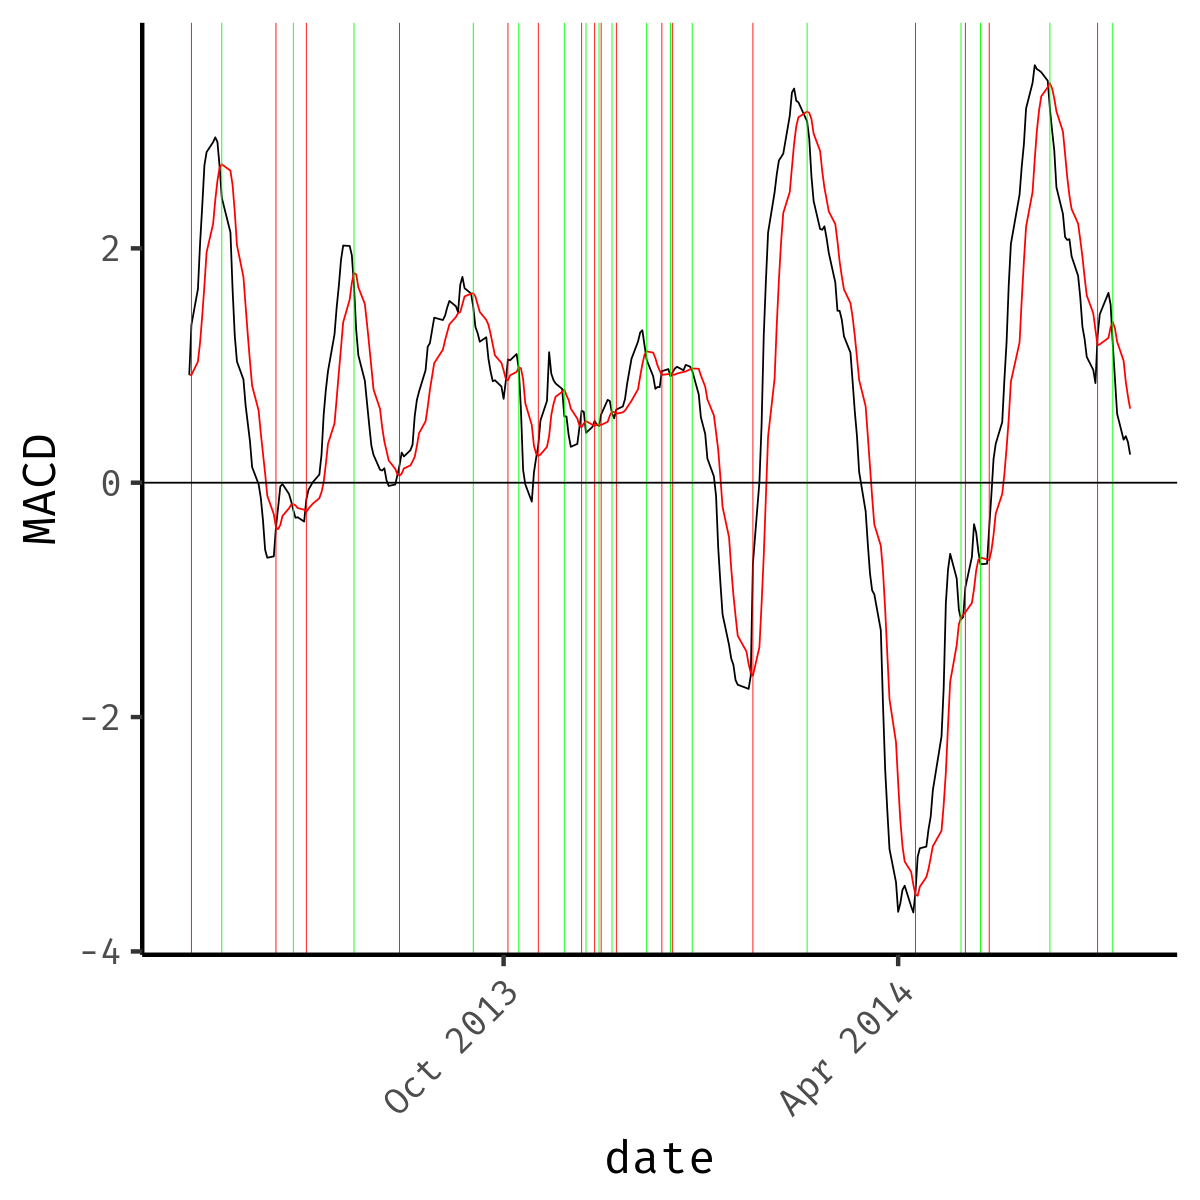

In [75]:
plot <- full_macd + 
geom_vline(xintercept = sell$date, colour="red", size=0.1) +
geom_vline(xintercept = buy$date, colour="green", size=0.1) +
geom_hline(yintercept = 0, size=0.2)

plot

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

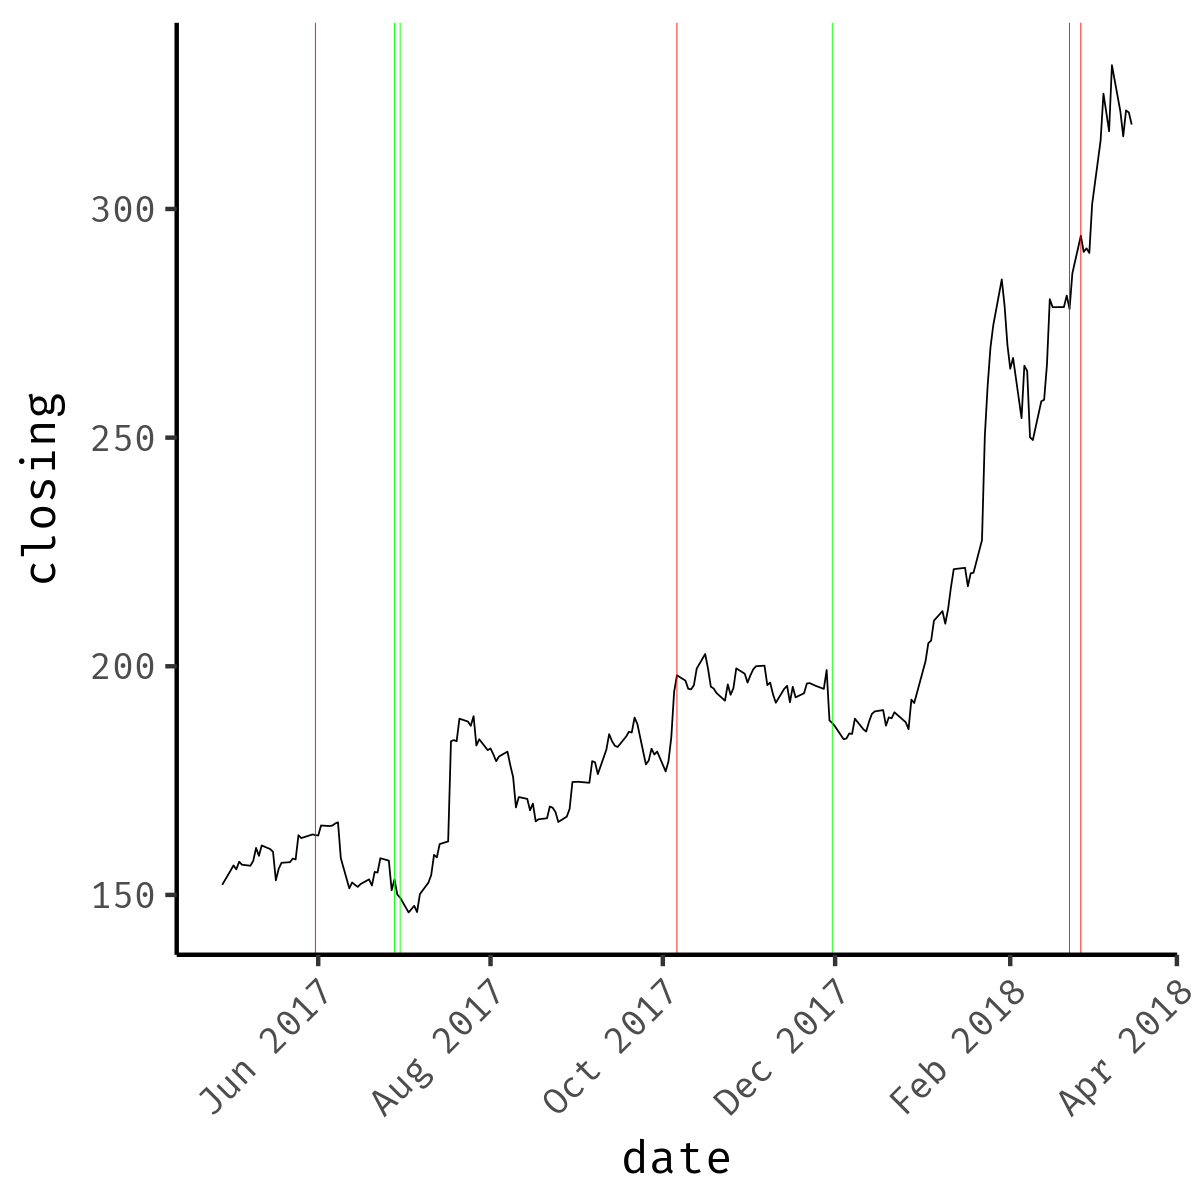

In [48]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
plot_value <- 
ggplot(data = data, 
               aes(
                   x = date,
                   y = closing,
                   group = 1
               ))+ 
geom_line(size = 0.2) +
geom_vline(xintercept = sell$date, colour="red", size=0.1) +
geom_vline(xintercept = buy$date, colour="green", size=0.1) +
scale_x_date(
    date_breaks = "2 months",
    date_labels="%b %Y"
            ) +
theme(
    axis.text.x = element_text(angle=45, hjust=1)
)

plot_value

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

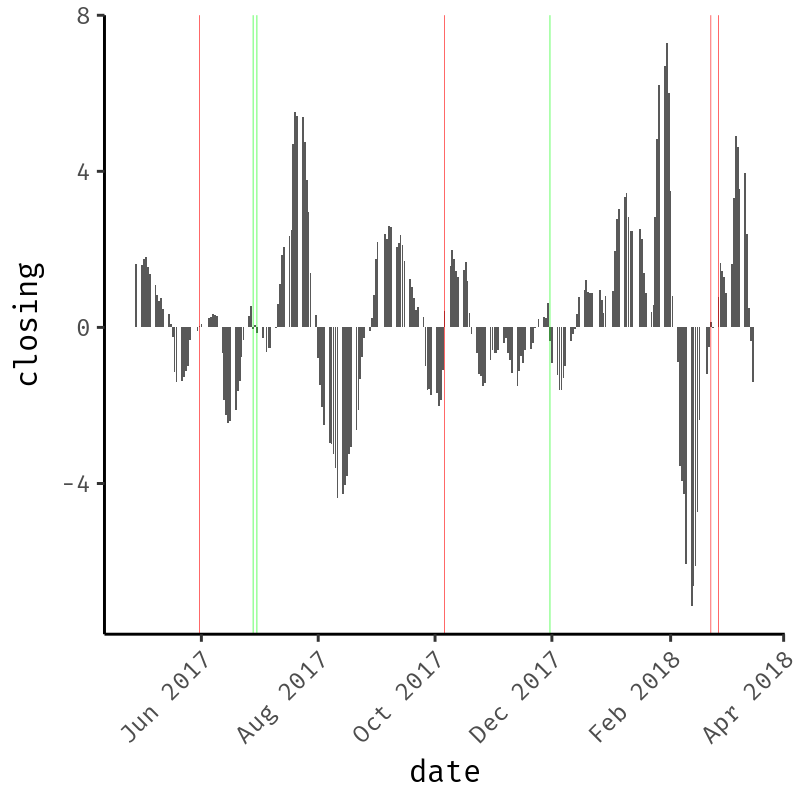

In [49]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
histogram_macd <- 
ggplot(data = data, 
               aes(
                   x = date,
                   y = closing,
                   group = 1
               ))+ 
geom_histogram(stat = "identity", aes(x = date, y = divergence)) +
geom_vline(xintercept = sell$date, colour="red", size=0.1) +
geom_vline(xintercept = buy$date, colour="green", size=0.1) +
scale_x_date(
    date_breaks = "2 months",
    date_labels="%b %Y"
            ) +
theme(
    axis.text.x = element_text(angle=45, hjust=1)
)

histogram_macd